In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

From: https://www.apple.com/covid19/mobility

Notes on mobility data:
* Apple has higher temporal resolution (from Jan 13), but only covers larger cities and whole countries
* Google has higher spatial resolution (county level, even for VT), but lower temporal resolution. 3 Observations as of yesterday (seems to update every 7 days)
* Google, being actual location data, also has tags for the locations (rec, retail, etc). Apple only has trip type
* Seeing as the Reddit data will have better coverage for large cities, I'm inclined to use the Apple data for the time being. 
* Next steps: find some meaningful join between mobility and text data. Most likely starting with simple time series.


In [4]:
#apple_mob_dat = pd.read_csv('../data/mobility_data/applemobilitytrends-2020-04-15.csv')
apple_mob_dat = pd.read_csv('../data/mobility_data/applemobilitytrends-2020-04-15.csv')

In [9]:
pprint(apple_mob_dat[apple_mob_dat['geo_type']=='city'].region.unique())

array(['Amsterdam', 'Athens', 'Atlanta', 'Auckland', 'Baltimore',
       'Bangkok', 'Barcelona', 'Berlin', 'Birmingham - UK',
       'Bochum - Dortmund', 'Boston', 'Brisbane', 'Brussels',
       'Buenos Aires', 'Cairo', 'Calgary', 'Cape Town', 'Chicago',
       'Cologne', 'Copenhagen', 'Dallas', 'Delhi', 'Denver', 'Detroit',
       'Dubai', 'Dublin', 'Dusseldorf', 'Edmonton', 'Frankfurt',
       'Fukuoka', 'Guadalajara', 'Halifax', 'Hamburg', 'Helsinki',
       'Houston', 'Hsin-chu', 'Istanbul', 'Jakarta', 'Johannesburg',
       'Kuala Lumpur', 'Leeds', 'Lille', 'London', 'Los Angeles', 'Lyon',
       'Madrid', 'Manchester', 'Manila', 'Melbourne', 'Mexico City',
       'Miami', 'Milan', 'Montreal', 'Moscow', 'Mumbai', 'Munich',
       'Nagoya', 'New York City', 'Osaka', 'Oslo', 'Ottawa', 'Paris',
       'Perth', 'Philadelphia', 'Rio de Janeiro', 'Riyadh', 'Rome',
       'Rotterdam', 'Saint Petersburg', 'San Francisco - Bay Area',
       'Santiago', 'Sao Paulo', 'Seattle', 'Seoul', 'Sto

In [12]:
available= ['New York City', 'Los Angeles', 'Boston', 'Chicago', 'Atlanta']

In [7]:
reddit_targets = ['New York City', 'Los Angeles', 'Portland', 'Chicago', 'Austin']

In [14]:
top5 = apple_mob_dat[apple_mob_dat.region.isin(available)]

In [23]:
top5.head()

,geo_type,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15
158,city,Atlanta,driving,100,105.48,105.94,111.42,127.24,116.70,89.95,...,53.94,54.03,55.37,58.28,65.17,59.29,35.11,58.81,60.92,64.77
159,city,Atlanta,transit,100,99.32,100.88,102.85,100.49,88.70,73.27,...,44.19,42.36,43.97,45.27,44.01,41.58,31.44,45.54,46.89,43.81
160,city,Atlanta,walking,100,104.02,111.64,111.78,127.28,133.70,97.93,...,55.13,53.37,55.49,58.74,64.38,62.96,33.81,56.49,59.84,62.57
181,city,Boston,driving,100,102.84,108.22,109.17,124.38,102.86,84.10,...,42.53,43.91,40.27,39.41,48.47,47.59,31.69,35.54,47.43,46.97
182,city,Boston,transit,100,100.59,105.25,104.49,111.98,109.27,95.06,...,18.30,18.38,17.65,17.14,17.16,17.21,15.27,17.35,18.30,19.35


In [65]:
pd.to_datetime(top5.columns[3:]).weekday

Int64Index([0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
            1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
            3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
            4, 5, 6, 0, 1, 2],
           dtype='int64')

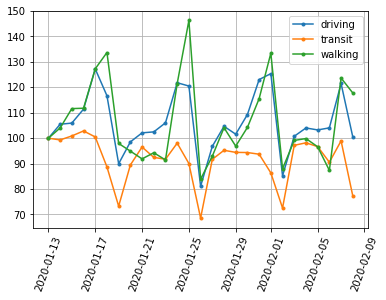

In [78]:
plt.plot(pd.to_datetime(top5.iloc[0,3:30].index),top5.iloc[0,3:30],marker='.', label = top5.iloc[0,2])
plt.plot(pd.to_datetime(top5.iloc[1,3:30].index),top5.iloc[1,3:30],marker='.',label = top5.iloc[1,2])
plt.plot(pd.to_datetime(top5.iloc[2,3:30].index),top5.iloc[2,3:30],marker='.',label = top5.iloc[2,2])
plt.legend()
plt.xticks(rotation=70)
plt.grid()

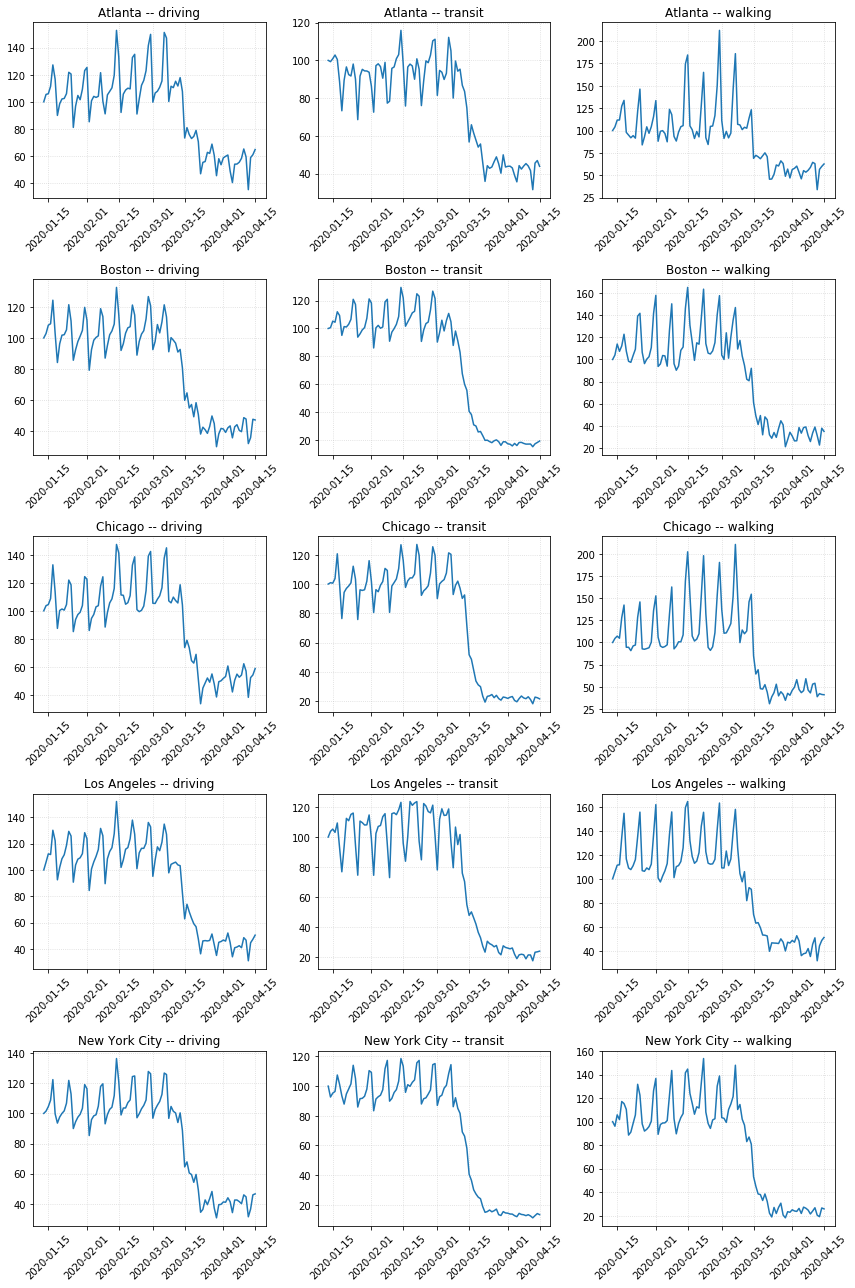

In [60]:
f,a = plt.subplots(5,3,figsize=(12,18))

a = a.ravel()

for i in range(top5.shape[0]):
    a[i].plot(pd.to_datetime(top5.iloc[i,3:].index),top5.iloc[i,3:])
    a[i].tick_params(axis='x', rotation=45)
    a[i].grid(alpha=.5, linestyle=':')
    a[i].set_title(f"{top5.iloc[i,:]['region']} -- {top5.iloc[i,:]['transportation_type']}")
f.tight_layout()

* rolling variance in time series? or better framed as periodicity? e.g. driving seems to retain weekly cycle in NYC

## detrend?

### Detrending (the wrong way)

In [110]:
x1,y1 = pd.to_datetime(top5.iloc[0,3:].index),top5.iloc[0,3:].values
x2,y2 = pd.to_datetime(top5.iloc[1,3:].index),top5.iloc[1,3:].values
x3,y3 = pd.to_datetime(top5.iloc[2,3:].index),top5.iloc[2,3:].values
#plt.legend()
#plt.xticks(rotation=70)
#plt.grid()

In [208]:
new_df = pd.DataFrame(y2,index=x1)
new_df

,0
2020-01-13,100
2020-01-14,99.32
2020-01-15,100.88
2020-01-16,102.85
2020-01-17,100.49
...,...
2020-04-11,41.58
2020-04-12,31.44
2020-04-13,45.54
2020-04-14,46.89


In [198]:
#new_df = new_df-new_df.mean()
new_df = new_df/new_df.max()

In [199]:
rolling_mean = new_df[1].rolling(7).mean(center=True).fillna(method='bfill').fillna(method='ffill') #.interpolate(method='pad')

In [200]:
rolling_mean=rolling_mean-rolling_mean.min()

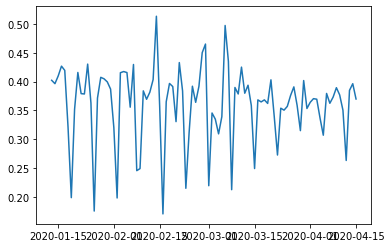

In [201]:
plt.plot(new_df[1] - rolling_mean)
#plt.plot(rolling_mean)
#plt.plot(new_df)

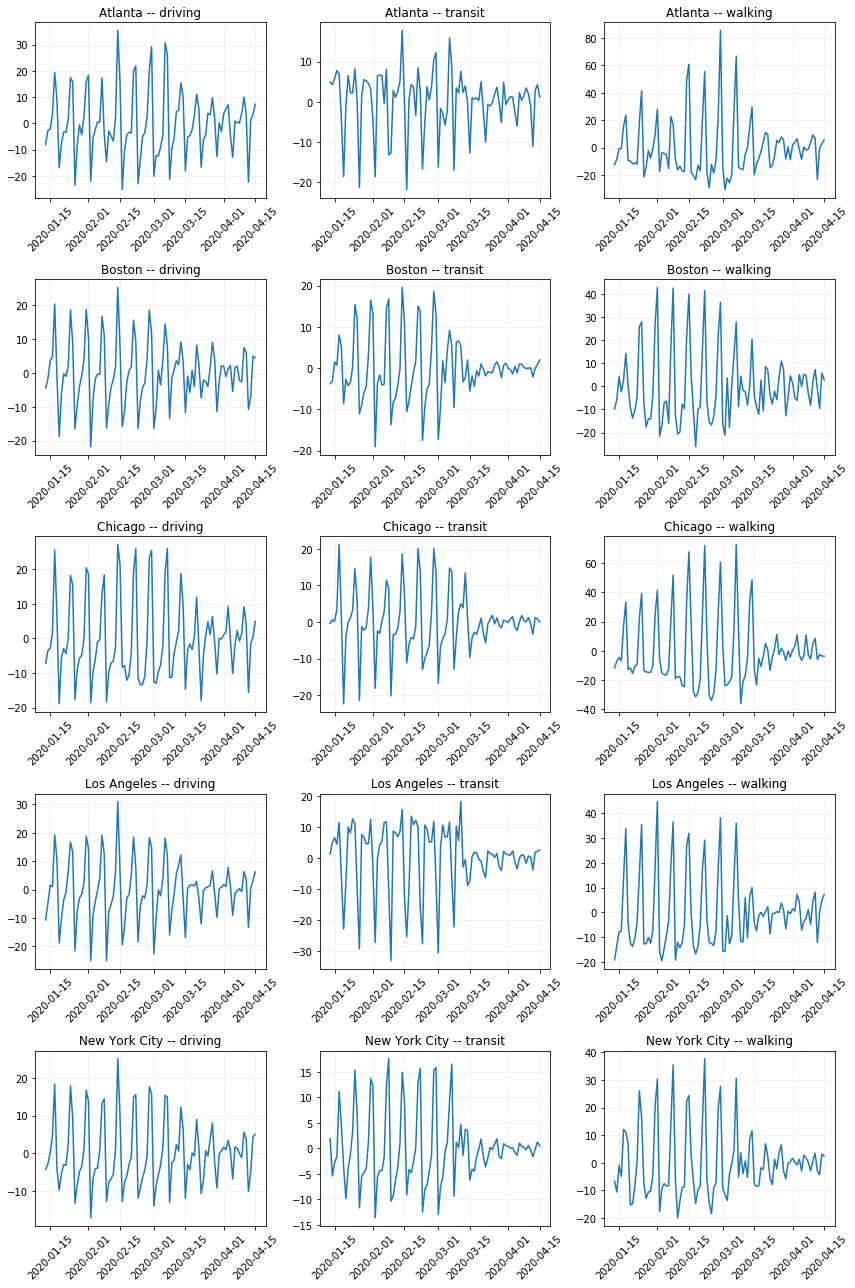

In [216]:
f,a = plt.subplots(5,3,figsize=(12,18))

a = a.ravel()

for i in range(top5.shape[0]):
    temp_df = pd.DataFrame(top5.iloc[i,3:], index =  pd.to_datetime(top5.iloc[i,3:].index))
    temp_df.columns = ['Mobility']
    rolling_mean = temp_df['Mobility'].rolling(7).mean(center=True).fillna(method='bfill').fillna(method='ffill')
    a[i].plot(temp_df['Mobility']-rolling_mean)
    a[i].tick_params(axis='x', rotation=45)
    a[i].grid(alpha=.5, linestyle=':')
    a[i].set_title(f"{top5.iloc[i,:]['region']} -- {top5.iloc[i,:]['transportation_type']}")
f.tight_layout()